In [204]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
%matplotlib inline

In [205]:
# Read in mapreduce output csv as a dataframe
df = pd.read_csv("CosmeticEC.csv",index_col=0)
df

user_id  Monetary  Frequency Recent_Date
0      562288986     39.61          8  2020-01-01
1      488417434     78.84         20  2020-02-17
2      515285785     20.99          5  2020-01-02
3      596274199     25.58          9  2020-01-03
4      129675214     41.17          9  2020-01-03
...          ...       ...        ...         ...
49468  615187883     11.11          2  2020-02-28
49469  621877707      9.54          6  2020-02-29
49470  621924311      0.16          1  2020-02-29
49471  622041514      1.90          3  2020-02-29
49472  621597689     17.30          2  2020-02-29

[49473 rows x 4 columns]

In [206]:
df.dtypes

user_id          int64
Monetary       float64
Frequency        int64
Recent_Date     object
dtype: object

In [207]:
#Chaneg the format of the Recenta date column for processing
df["Recent_Date"] = pd.to_datetime(df["Recent_Date"],format = "%Y/%m/%d")

In [208]:
# Since we have 2 months of data, we choose 2 days after the end of February as a time stamp.The last
# purchase date made per user is subtracted from the time stamp to get the recency value.
import datetime as dt
study_date = dt.datetime(2020,3,2)
df["Recency"] = study_date - df["Recent_Date"]
df['Recency'].astype('timedelta64[D]')
df['Recency']=df['Recency'] / np.timedelta64(1, 'D')

In [209]:
# Final RFM frame
df

user_id  Monetary  Frequency Recent_Date  Recency
0      562288986     39.61          8  2020-01-01     61.0
1      488417434     78.84         20  2020-02-17     14.0
2      515285785     20.99          5  2020-01-02     60.0
3      596274199     25.58          9  2020-01-03     59.0
4      129675214     41.17          9  2020-01-03     59.0
...          ...       ...        ...         ...      ...
49468  615187883     11.11          2  2020-02-28      3.0
49469  621877707      9.54          6  2020-02-29      2.0
49470  621924311      0.16          1  2020-02-29      2.0
49471  622041514      1.90          3  2020-02-29      2.0
49472  621597689     17.30          2  2020-02-29      2.0

[49473 rows x 5 columns]

In [210]:
#Selection of necessary columns
finaldf = df[["user_id","Monetary","Frequency","Recency"]]

In [211]:
finaldf

user_id  Monetary  Frequency  Recency
0      562288986     39.61          8     61.0
1      488417434     78.84         20     14.0
2      515285785     20.99          5     60.0
3      596274199     25.58          9     59.0
4      129675214     41.17          9     59.0
...          ...       ...        ...      ...
49468  615187883     11.11          2      3.0
49469  621877707      9.54          6      2.0
49470  621924311      0.16          1      2.0
49471  622041514      1.90          3      2.0
49472  621597689     17.30          2      2.0

[49473 rows x 4 columns]

In [212]:
# determining top 10 customers by Monetary and Frequency
customers_top10_byvalue = finaldf.sort_values(by=['Monetary'], ascending=False)
customers_top10_byvalue = customers_top10_byvalue[:10]
customers_top10_byvalue 
customers_top10_byFreq = finaldf.sort_values(by=['Frequency'], ascending=False)
customers_top10_byFreq = customers_top10_byFreq[:10]
customers_top10_byFreq

user_id  Monetary  Frequency  Recency
35925  601469771   1373.45        461     17.0
20058  566439116    925.13        409     18.0
13098  556579890   1003.15        401      4.0
6295   469299888   1786.01        389      8.0
20099  548209402    724.80        375     11.0
13609  480463194    565.28        361      3.0
46200  620029655    766.13        324      5.0
1793   538580192   1512.65        288     11.0
39102  573823111   1559.21        268     10.0
21176  582804703    810.26        264      5.0

<AxesSubplot:xlabel='user_id'>

<Figure size 960x640 with 0 Axes>

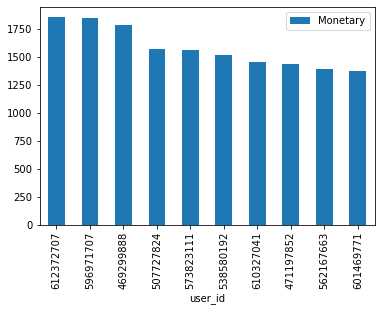

In [213]:
# Bar plot of Top Spenders
figure(figsize=(12, 8), dpi=80)
customers_top10_byvalue.plot(x="user_id", y=["Monetary"], kind="bar")

<AxesSubplot:xlabel='user_id'>

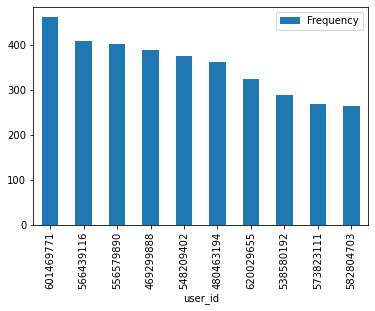

In [214]:
# Bar plot of top 10 frequent purchases.
customers_top10_byFreq.plot(x="user_id", y=["Frequency"], kind="bar")

In [215]:
#Normalise the data for kmeans clustering
dfkmeans = finaldf[["Monetary","Frequency","Recency"]]

from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(dfkmeans.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dfkmeans.index, columns=dfkmeans.columns)

In [216]:
X = scaled_features_df.copy()
X

Monetary  Frequency   Recency
0     -0.165906  -0.154987  1.909974
1      0.400787   0.681442 -0.928292
2     -0.434879  -0.364095  1.849586
3     -0.368575  -0.085285  1.789197
4     -0.143371  -0.085285  1.789197
...         ...        ...       ...
49468 -0.577600  -0.573202 -1.592567
49469 -0.600279  -0.294392 -1.652955
49470 -0.735777  -0.642905 -1.652955
49471 -0.710642  -0.503500 -1.652955
49472 -0.488183  -0.573202 -1.652955

[49473 rows x 3 columns]

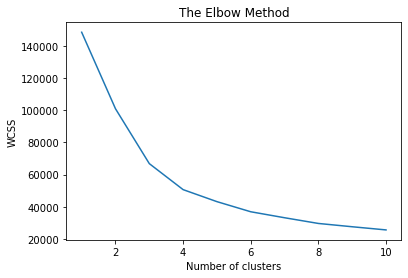

In [217]:
# Determine the optimal customer segmentation cluster by reducing the within cluster sum of squares

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [218]:
#use the kmeans cluster with 4 clusters based Elbow method where 4 clusters seem optimal
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(X)
y_hc = kmeans.fit_predict(X)

In [219]:
# Set up dataframe with cluster labels with a copy of the exisitng dataframe
Xnew = X.copy()
Xnew["CLUSTERS"] = y_hc
Xnew.sample(10, random_state=0)

Monetary  Frequency   Recency  CLUSTERS
40590 -0.561710  -0.573202 -1.109458         1
33677  0.187284   0.402632 -1.109458         1
28794 -0.173995  -0.503500 -0.264017         1
2728  -0.477782  -0.224690  1.547642         0
37958 -0.479082  -0.503500  0.279481         0
13054 -0.286958  -0.294392  1.064533         0
33615 -0.483127  -0.433797 -0.445183         1
49344 -0.589012  -0.642905 -1.351012         1
45919 -0.439935  -0.294392 -1.411401         1
11271  0.351962   0.681442  1.185311         0

In [220]:
# Count the number of observations in each cluster
Xnew['CLUSTERS'].value_counts()

0    23101
1    21366
2     4651
3      355
Name: CLUSTERS, dtype: int64

In [221]:
# prepare data for 2 axis and 3 axis visualisation
xval = Xnew.iloc[:,[0,1,2]].values
xval

array([[-0.16590594, -0.15498735,  1.90997431],
       [ 0.40078714,  0.68144223, -0.92829179],
       [-0.43487931, -0.36409475,  1.84958567],
       ...,
       [-0.73577702, -0.64290461, -1.65295548],
       [-0.71064202, -0.50349968, -1.65295548],
       [-0.48818284, -0.57320215, -1.65295548]])

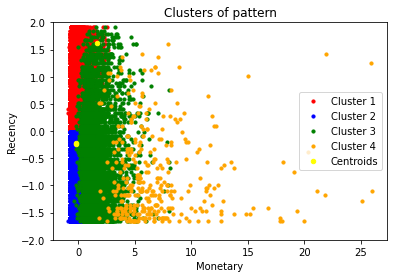

In [222]:
# Use scatter plot to 
plt.scatter(xval[y_hc == 0, 0], xval[y_hc == 0,2], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(xval[y_hc == 1, 0], xval[y_hc == 1, 2], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(xval[y_hc == 2, 0], xval[y_hc == 2, 2], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(xval[y_hc == 3, 0], xval[y_hc == 3, 2], s = 10, c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters of pattern')
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.ylim((-2,2))
plt.legend()
plt.show()

In [223]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [227]:
# 3d scatterplot using plotly library Animated visualisation
Scene = dict(xaxis = dict(title  = 'Amount'),yaxis = dict(title  = 'Frequency'),zaxis = dict(title  = 'Recency'))

labels = kmeans.labels_
trace = go.Scatter3d(x=xval[:, 0], y=xval[:, 1], z=xval[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

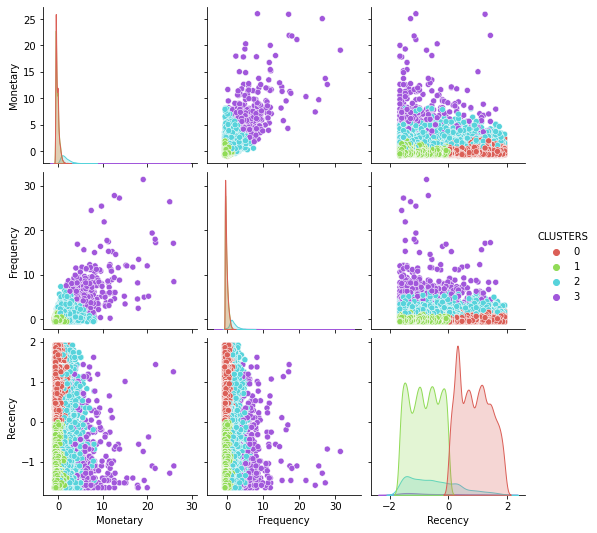

In [225]:
# Plot using seaborn for pairwise visualisation and interpretation
var = ["Monetary","Frequency","Recency"]

ax = sns.pairplot(Xnew,vars=var,hue="CLUSTERS", palette=sns.color_palette("hls",4))

plt.show()

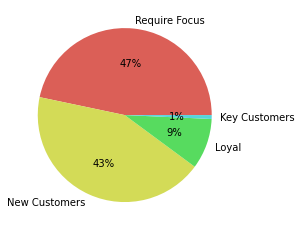

In [226]:
# Pie chart to show the distribution based on the interpretation of the above

listcl = Xnew['CLUSTERS'].value_counts().tolist()
labels = ['Require Focus', 'New Customers', 'Loyal', 'Key Customers']

#pie chart based on the cluster analysis
plt.pie(listcl, labels = labels, colors = sns.color_palette('hls')[0:5], autopct='%.0f%%')
plt.show()